# Base XGBoost Model


# Load Packages


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, roc_curve, average_precision_score, precision_recall_curve
import xgboost as xgb

plt.style.use('seaborn-v0_8')
sns.set_palette("husl")
warnings.filterwarnings('ignore')

pd.set_option('display.max_columns', None)
pd.set_option('display.width', None)
pd.set_option('display.max_colwidth', None)

print("All packages loaded successfully!")

All packages loaded successfully!


# Load Data


In [ ]:
df = pd.read_csv('../data/stroke_data_prepared.csv')
print(f"Dataset shape: {df.shape}")
print(f"Features: {df.columns.tolist()}")
df.head()

Dataset shape: (5110, 17)
Features: ['id', 'age', 'avg_glucose_level', 'bmi', 'stroke', 'gender_Male', 'hypertension_Yes', 'heart_disease_Yes', 'ever_married_Yes', 'work_type_Never_worked', 'work_type_Private', 'work_type_Self-employed', 'work_type_children', 'Residence_type_Urban', 'smoking_status_formerly smoked', 'smoking_status_never smoked', 'smoking_status_smokes']


,id,age,avg_glucose_level,bmi,stroke,gender_Male,hypertension_Yes,heart_disease_Yes,ever_married_Yes,work_type_Never_worked,work_type_Private,work_type_Self-employed,work_type_children,Residence_type_Urban,smoking_status_formerly smoked,smoking_status_never smoked,smoking_status_smokes
0,9046,0.611111,3.712987,0.944444,1,1,0,1,1,0,1,0,0,1,1,0,0
1,51676,0.444444,2.994300,0.000000,1,0,0,0,1,0,0,1,0,0,0,1,0
2,31112,0.972222,0.380920,0.488889,1,1,0,1,1,0,1,0,0,0,0,1,0
3,60182,0.111111,2.153481,0.700000,1,0,0,0,1,0,1,0,0,1,0,0,1
4,1665,0.944444,2.231917,-0.455556,1,0,1,0,1,0,0,1,0,0,0,1,0


In [ ]:
print("Target variable (stroke) distribution:")
print(df['stroke'].value_counts())
print(f"\nClass distribution:")
print(df['stroke'].value_counts(normalize=True))

Target variable (stroke) distribution:
stroke
0    4861
1     249
Name: count, dtype: int64

Class distribution:
stroke
0    0.951272
1    0.048728
Name: proportion, dtype: float64


# Data Preprocessing


In [ ]:
X = df.drop(['stroke', 'id'], axis=1)
y = df['stroke']

print(f"Feature matrix shape: {X.shape}")
print(f"Target vector shape: {y.shape}")
print(f"Features: {list(X.columns)}")

Feature matrix shape: (5110, 15)
Target vector shape: (5110,)
Features: ['age', 'avg_glucose_level', 'bmi', 'gender_Male', 'hypertension_Yes', 'heart_disease_Yes', 'ever_married_Yes', 'work_type_Never_worked', 'work_type_Private', 'work_type_Self-employed', 'work_type_children', 'Residence_type_Urban', 'smoking_status_formerly smoked', 'smoking_status_never smoked', 'smoking_status_smokes']


In [ ]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y, 
    test_size=0.2, 
    random_state=42, 
    stratify=y
)

print(f"Training set shape: {X_train.shape}")
print(f"Testing set shape: {X_test.shape}")
print(f"Training target distribution:")
print(y_train.value_counts(normalize=True))
print(f"Testing target distribution:")
print(y_test.value_counts(normalize=True))

Training set shape: (4088, 15)
Testing set shape: (1022, 15)
Training target distribution:
stroke
0    0.951321
1    0.048679
Name: proportion, dtype: float64
Testing target distribution:
stroke
0    0.951076
1    0.048924
Name: proportion, dtype: float64


# Base XGBoost Model


In [ ]:
base_model = xgb.XGBClassifier(
    tree_method='hist',  
    eval_metric='aucpr', 
    random_state=42
)

print("Base XGBoost model created with default settings")
print("Key settings:")
print(f"  - Tree method: {base_model.tree_method}")
print(f"  - Eval metric: {base_model.eval_metric}")
print(f"  - Objective: {base_model.objective}")
print("\nFull model parameters:")
print(base_model.get_params())

Base XGBoost model created with default settings
Key settings:
  - Tree method: hist
  - Eval metric: aucpr
  - Objective: binary:logistic

Full model parameters:
{'objective': 'binary:logistic', 'base_score': None, 'booster': None, 'callbacks': None, 'colsample_bylevel': None, 'colsample_bynode': None, 'colsample_bytree': None, 'device': None, 'early_stopping_rounds': None, 'enable_categorical': False, 'eval_metric': 'aucpr', 'feature_types': None, 'feature_weights': None, 'gamma': None, 'grow_policy': None, 'importance_type': None, 'interaction_constraints': None, 'learning_rate': None, 'max_bin': None, 'max_cat_threshold': None, 'max_cat_to_onehot': None, 'max_delta_step': None, 'max_depth': None, 'max_leaves': None, 'min_child_weight': None, 'missing': nan, 'monotone_constraints': None, 'multi_strategy': None, 'n_estimators': None, 'n_jobs': None, 'num_parallel_tree': None, 'random_state': 42, 'reg_alpha': None, 'reg_lambda': None, 'sampling_method': None, 'scale_pos_weight': None,

In [ ]:
print("Training base XGBoost model...")
base_model.fit(X_train, y_train)
print("Model training completed!")

Training base XGBoost model...
Model training completed!


# Model Evaluation


In [ ]:
y_pred = base_model.predict(X_test)
y_pred_proba = base_model.predict_proba(X_test)[:, 1]

print("Predictions completed!")

Predictions completed!


In [ ]:
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)
roc_auc = roc_auc_score(y_test, y_pred_proba)
auprc = average_precision_score(y_test, y_pred_proba)

print("Base Model Performance Metrics:")
print("="*45)
print(f"AUPRC (PRIMARY METRIC): {auprc:.4f}")
print("="*45)
print(f"Accuracy:  {accuracy:.4f}")
print(f"Precision: {precision:.4f}")
print(f"Recall:    {recall:.4f}")
print(f"F1-Score:  {f1:.4f}")
print(f"ROC-AUC:   {roc_auc:.4f}")

Base Model Performance Metrics:
AUPRC (PRIMARY METRIC): 0.1507
Accuracy:  0.9423
Precision: 0.2000
Recall:    0.0600
F1-Score:  0.0923
ROC-AUC:   0.7928


In [ ]:
print("Classification Report:")
print(classification_report(y_test, y_pred))

Classification Report:
              precision    recall  f1-score   support

           0       0.95      0.99      0.97       972
           1       0.20      0.06      0.09        50

    accuracy                           0.94      1022
   macro avg       0.58      0.52      0.53      1022
weighted avg       0.92      0.94      0.93      1022



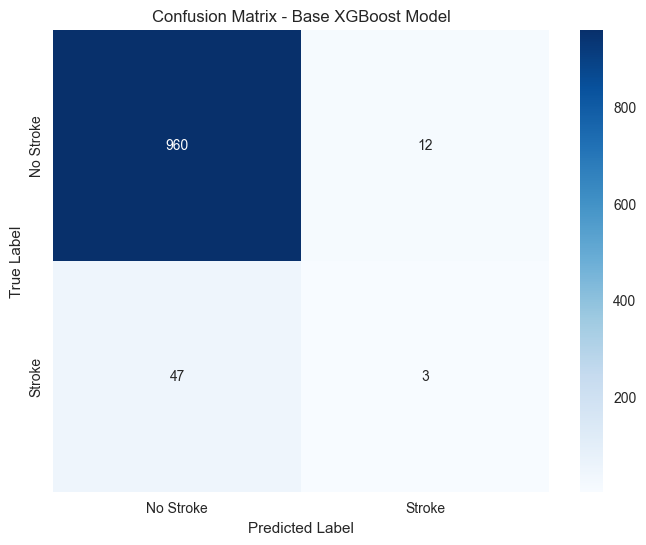

In [ ]:
plt.figure(figsize=(8, 6))
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', 
            xticklabels=['No Stroke', 'Stroke'], 
            yticklabels=['No Stroke', 'Stroke'])
plt.title('Confusion Matrix - Base XGBoost Model')
plt.ylabel('True Label')
plt.xlabel('Predicted Label')
plt.show()

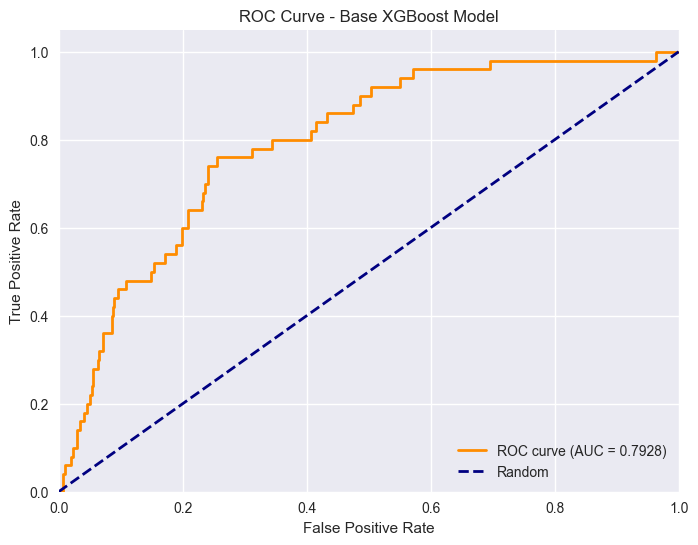

In [ ]:
plt.figure(figsize=(8, 6))
fpr, tpr, _ = roc_curve(y_test, y_pred_proba)
plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC curve (AUC = {roc_auc:.4f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--', label='Random')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve - Base XGBoost Model')
plt.legend(loc="lower right")
plt.show()

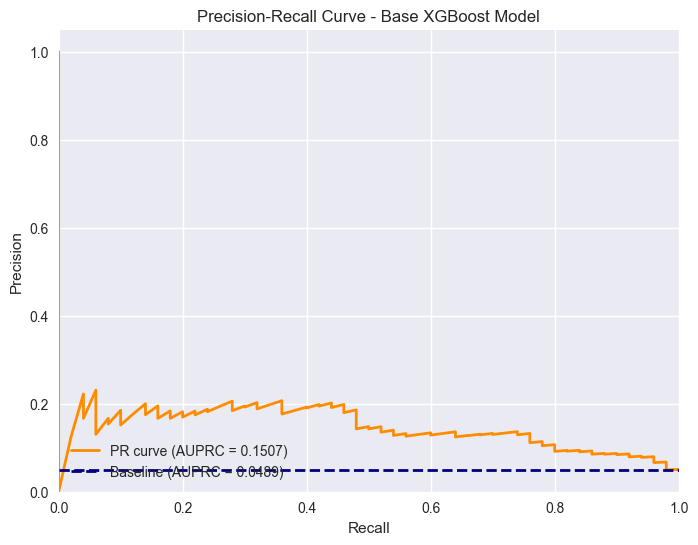

In [ ]:
plt.figure(figsize=(8, 6))
precision_curve, recall_curve, _ = precision_recall_curve(y_test, y_pred_proba)
plt.plot(recall_curve, precision_curve, color='darkorange', lw=2, 
         label=f'PR curve (AUPRC = {auprc:.4f})')

baseline = y_test.mean()
plt.axhline(y=baseline, color='navy', lw=2, linestyle='--', 
           label=f'Baseline (AUPRC = {baseline:.4f})')

plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall Curve - Base XGBoost Model')
plt.legend(loc="lower left")
plt.show()

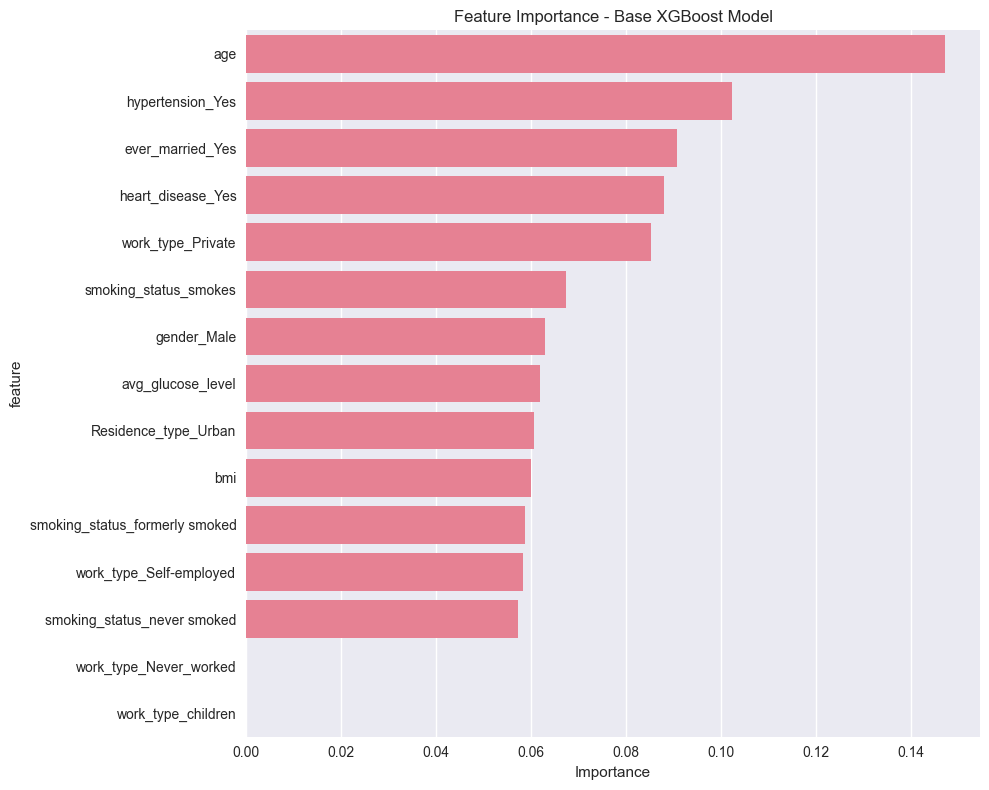

Top 5 Most Important Features:
             feature  importance
0                age    0.147100
4   hypertension_Yes    0.102316
6   ever_married_Yes    0.090783
5  heart_disease_Yes    0.087846
8  work_type_Private    0.085138


In [ ]:
plt.figure(figsize=(10, 8))
feature_importance = base_model.feature_importances_
feature_names = X.columns
importance_df = pd.DataFrame({
    'feature': feature_names,
    'importance': feature_importance
}).sort_values('importance', ascending=False)

sns.barplot(data=importance_df, x='importance', y='feature')
plt.title('Feature Importance - Base XGBoost Model')
plt.xlabel('Importance')
plt.tight_layout()
plt.show()

print("Top 5 Most Important Features:")
print(importance_df.head())

# Summary


In [ ]:
print("Base XGBoost Model Summary:")
print("="*50)
print(f"Dataset: Stroke Prediction ({X.shape[0]:,} samples, {X.shape[1]} features)")
print(f"Class Distribution: {(1-y.mean())*100:.1f}% No Stroke, {y.mean()*100:.1f}% Stroke")
print(f"Train/Test Split: {len(X_train):,} / {len(X_test):,}")
print()
print("Performance Metrics:")
print(f"  - AUPRC (PRIMARY): {auprc:.4f}")
print(f"  - Baseline AUPRC:  {y.mean():.4f}")
print(f"  - Accuracy:        {accuracy:.4f}")
print(f"  - Precision:       {precision:.4f}")
print(f"  - Recall:          {recall:.4f}")
print(f"  - F1-Score:        {f1:.4f}")
print(f"  - ROC-AUC:         {roc_auc:.4f}")

Base XGBoost Model Summary:
Dataset: Stroke Prediction (5,110 samples, 15 features)
Class Distribution: 95.1% No Stroke, 4.9% Stroke
Train/Test Split: 4,088 / 1,022

Performance Metrics:
  - AUPRC (PRIMARY): 0.1507
  - Baseline AUPRC:  0.0487
  - Accuracy:        0.9423
  - Precision:       0.2000
  - Recall:          0.0600
  - F1-Score:        0.0923
  - ROC-AUC:         0.7928

AUPRC is the primary metric for this imbalanced dataset.
It focuses on positive class performance, unlike ROC-AUC which
can be overly optimistic with class imbalance.

This base model will serve as the foundation for testing
various class imbalance handling techniques.
